## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
x1 = [5, 5.5, 6  , 4.6, 9.8, 6.1,3.9,11.5,2.9,4.1,12, 13.1,       10 ,11.2, 11.4,13.6,7 ,7.6,7.59,10, 12, 12.6, 13]
x2 = [1, 2.3, 1.3, 1.2, 1.5, 2  ,2.5, 3  ,2.8,1.4,1.9, 3.2,      11.2,11.4, 13.6, 15 ,12, 14,8   ,13, 13, 10  , 10.7]
y  = [0, 0  , 0  , 0  ,  0 ,  0 , 0 , 1  , 0 , 0 ,1  ,  1 ,       1  ,  1 , 1   , 1  ,0 ,  1, 1  , 1,  1,    1,   1]

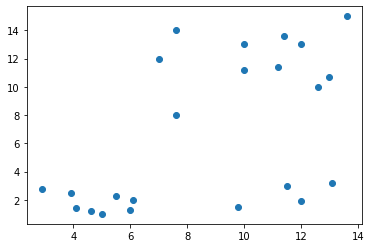

In [3]:
plt.scatter(x1, x2)

In [4]:
import pandas as pd

df = pd.DataFrame( list(zip(x1,x2, y)), columns = ['x1', 'x2', 'y'], index = None)
df

,x1,x2,y
0,5.00,1.0,0
1,5.50,2.3,0
2,6.00,1.3,0
3,4.60,1.2,0
4,9.80,1.5,0
5,6.10,2.0,0
6,3.90,2.5,0
7,11.50,3.0,1
8,2.90,2.8,0
9,4.10,1.4,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

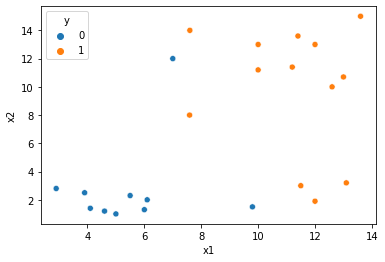

In [5]:
import seaborn as sns

sns.scatterplot(x = 'x1', y= 'x2', data = df, hue = 'y')

In [6]:
X =df.iloc[:,:-1].values
X

array([[ 5.  ,  1.  ],
       [ 5.5 ,  2.3 ],
       [ 6.  ,  1.3 ],
       [ 4.6 ,  1.2 ],
       [ 9.8 ,  1.5 ],
       [ 6.1 ,  2.  ],
       [ 3.9 ,  2.5 ],
       [11.5 ,  3.  ],
       [ 2.9 ,  2.8 ],
       [ 4.1 ,  1.4 ],
       [12.  ,  1.9 ],
       [13.1 ,  3.2 ],
       [10.  , 11.2 ],
       [11.2 , 11.4 ],
       [11.4 , 13.6 ],
       [13.6 , 15.  ],
       [ 7.  , 12.  ],
       [ 7.6 , 14.  ],
       [ 7.59,  8.  ],
       [10.  , 13.  ],
       [12.  , 13.  ],
       [12.6 , 10.  ],
       [13.  , 10.7 ]])

In [7]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [8]:
y.shape

(23,)

## Implimenting Logistic regression model from sklearn library

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lgr = LogisticRegression()

In [11]:
lgr.fit(X.reshape(23,2), y)

LogisticRegression()

In [12]:
y_predict = lgr.predict(X.reshape(23, 2))

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_predict)

array([[ 9,  1],
       [ 1, 12]], dtype=int64)

<AxesSubplot:xlabel='x1', ylabel='x2'>

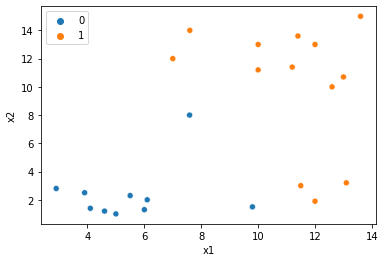

In [14]:
sns.scatterplot(x = 'x1', y= 'x2', data = df, hue = y_predict)

# Logistic Regression intuition

### Seeing How logistic regression is classifying

In [15]:
X = X.T
X.shape
X

array([[ 5.  ,  5.5 ,  6.  ,  4.6 ,  9.8 ,  6.1 ,  3.9 , 11.5 ,  2.9 ,
         4.1 , 12.  , 13.1 , 10.  , 11.2 , 11.4 , 13.6 ,  7.  ,  7.6 ,
         7.59, 10.  , 12.  , 12.6 , 13.  ],
       [ 1.  ,  2.3 ,  1.3 ,  1.2 ,  1.5 ,  2.  ,  2.5 ,  3.  ,  2.8 ,
         1.4 ,  1.9 ,  3.2 , 11.2 , 11.4 , 13.6 , 15.  , 12.  , 14.  ,
         8.  , 13.  , 13.  , 10.  , 10.7 ]])

In [16]:
y = df.iloc[:,-1].values
y = y.reshape(-1, 23)
y

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1]], dtype=int64)

In [17]:
def sigmoid(z):
    # this functions returns the sigmoid activation value
    A = 1 + np.exp(-z)
    return 1/A

In [18]:
## Cost function

def cost_function(y, y_pred, m):
    #cost = np.dot(y, np.log(y_pred))  -  np.dot((1-y), np.log(1-y_pred))
    cost = np.multiply(y, np.log(y_pred))  -  np.multiply((1-y), np.log(1-y_pred))
    #return cost/m
    return np.sum(cost/m)
    

In [19]:
def back_propagation(y, y_pred, X, learn):
    dz = y_pred - y
    m = X.shape[0]
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)
    
    error = {'dw': dw, 'db': db}
    
    return error

In [20]:
def update_weights(error, learn, w, b):
    dw = error['dw']
    db = error['db']
    
    w = w - learn*dw
    b = b - learn*db
    
    return w, b;

In [21]:
# intial predictionn

def model(X, y, w, learn, b, iterations):
    for i in range(iterations):
        z = np.dot(w.T, X)
        y_pred = sigmoid(z)
        cost = 0
        m = X.shape[1]
        
        cost += cost_function(y, y_pred, m) # for iteration
        error = back_propagation(y, y_pred, X, learn)

        w, b = update_weights(error, learn, w, b)

        if(i%200==0):
            print("Cost Function value after .{} iterations is: .{}".format(i, cost))
            yhat = np.where(y_pred>=0.5, 1, 0)
            yhat = yhat.T.reshape(-1)
            
            sns.scatterplot(x = 'x1', y= 'x2', data = df, hue = yhat)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.title('.{}-iteration'.format(i+1))
            plt.show()
            
    return yhat

Cost Function value after .0 iterations is: .-0.09597961937146049


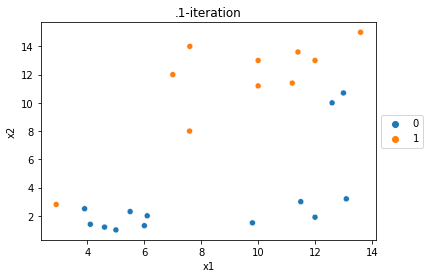

Cost Function value after .200 iterations is: .0.04660046483306313


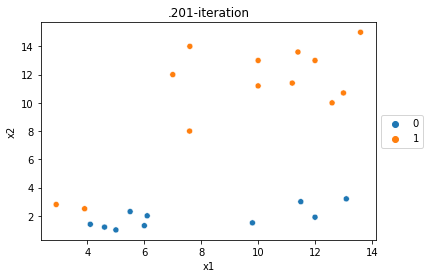

Cost Function value after .400 iterations is: .0.04660046483306313


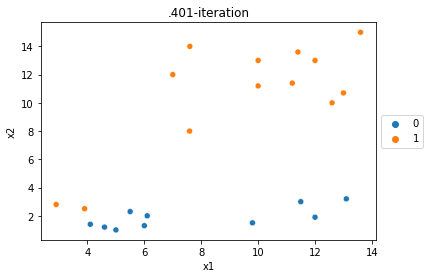

Cost Function value after .600 iterations is: .0.04660046483306313


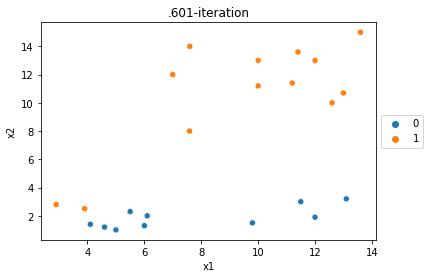

Cost Function value after .800 iterations is: .0.04660046483306313


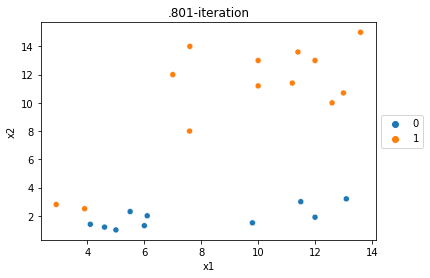

In [22]:
w = np.random.randn(2, 1)*0.01
learn = 0.01
b = 0
iterations = 1000


yhat = model(X, y, w, learn, b, iterations)

In [23]:
from sklearn.metrics import confusion_matrix


yhat = np.array(yhat).reshape(-1)
y = y.reshape(-1)

print(y)
print(yhat)

confusion_matrix(y, yhat)

[0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1]
[0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


array([[ 7,  3],
       [ 3, 10]], dtype=int64)